## Linear Regression

具有独立和同分布误差的线性模型，以及具有异方差或自相关误差的线性模型。该模块允许使用普通最小二乘(OLS)、加权最小二乘(WLS)、广义最小二乘(GLS)和具有自相关AR(p)误差的可行广义最小二乘进行估计。

In [1]:
import numpy as np
import statsmodels.api as sm

In [3]:
spector_data = sm.datasets.spector.load(as_pandas=False)

In [9]:
spector_data.exog[:2]

array([[ 2.66, 20.  ,  0.  ],
       [ 2.89, 22.  ,  0.  ]])

In [10]:
spector_data.raw_data[:2]

array([[ 2.66, 20.  ,  0.  ,  0.  ],
       [ 2.89, 22.  ,  0.  ,  0.  ]])

In [11]:
print(sm.add_constant.__doc__)


    Add a column of ones to an array.

    Parameters
    ----------
    data : array_like
        A column-ordered design matrix.
    prepend : bool
        If true, the constant is in the first column.  Else the constant is
        appended (last column).
    has_constant : str {'raise', 'add', 'skip'}
        Behavior if ``data`` already has a constant. The default will return
        data without adding another constant. If 'raise', will raise an
        error if any column has a constant value. Using 'add' will add a
        column of 1s if a constant column is present.

    Returns
    -------
    array_like
        The original values with a constant (column of ones) as the first or
        last column. Returned value type depends on input type.

    Notes
    -----
    When the input is recarray or a pandas Series or DataFrame, the added
    column's name is 'const'.
    


In [12]:
spector_data.exog = sm.add_constant(spector_data.exog,prepend=False)

In [13]:
spector_data.exog[:3]

array([[ 2.66, 20.  ,  0.  ,  1.  ],
       [ 2.89, 22.  ,  0.  ,  1.  ],
       [ 3.28, 24.  ,  0.  ,  1.  ]])

In [14]:
mod = sm.OLS(spector_data.endog,spector_data.exog)
res = mod.fit()

In [16]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Thu, 18 Jun 2020   Prob (F-statistic):            0.00157
Time:                        09:59:47   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

## 技术文档

假设统计模型为：

$Y = X\beta + \mu, where \mu~N(0,\sigma)$

根据Σ的性质,目前我们有四类:

 - GLS:任意的协方差Σ:广义最小二乘法

 - OLS:普通最小二乘法,Σ=I

 - WLS:加权最小二乘的异方差

 - GLSAR:自相关AR(p)误差的可行广义最小二乘Σ=Σ(ρ)

所有回归模型定义于相同的方法，遵循相同的结构，并且可以以类似的方式使用。其中一些包含附加的特定于模型的方法和属性。除了递归、滚动WLS和滚动OLS之外，GLS是其他回归类的超类。

下面是对所有回归类常见属性的详细描述:

In [20]:
mod.pinv_wexog # p x n 白色设计矩阵的Moore-Penrose伪逆
mod.df_model # 模型的自由度。这等于p - 1,其中p是回归量
mod.df_resid # 残差的自由度，这里等于 n - p,其中n是观测值p是参数的数量。
res.llf # 拟合模型的似然函数值。
res.nobs # 观测值n
res.normalized_cov_params # 标准化的协方差参数
mod.wexog # 权重外生变量
mod.wendog # 权重内生变量

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.])

### 普通最小二乘法回归 OLS

In [21]:
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [22]:
print(wls_prediction_std.__doc__) # 

calculate standard deviation and confidence interval for prediction

    applies to WLS and OLS, not to general GLS,
    that is independently but not identically distributed observations

    Parameters
    ----------
    res : regression result instance
        results of WLS or OLS regression required attributes see notes
    exog : array_like (optional)
        exogenous variables for points to predict
    weights : scalar or array_like (optional)
        weights as defined for WLS (inverse of variance of observation)
    alpha : float (default: alpha = 0.05)
        confidence level for two-sided hypothesis

    Returns
    -------
    predstd : array_like, 1d
        standard error of prediction
        same length as rows of exog
    interval_l, interval_u : array_like
        lower und upper confidence bounds

    Notes
    -----
    The result instance needs to have at least the following
    res.model.predict() : predicted values or
    res.fittedvalues : values used in estim

计算预测的标准差和置信区间

适用于WLS和OLS，不适用于一般的gl，这是独立的，但不是同分布的观测

OLS 估计

In [23]:
nsample = 100
x = np.linspace(0,10,nsample)
X = np.column_stack((x,x**2))

In [25]:
X = sm.add_constant(X)
beta = [1,0.1,10]
e = np.random.normal(nsample)

In [26]:
y = np.dot(X,beta) + e

In [32]:
mod = sm.OLS(y,X)
res = mod.fit()

In [33]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.733e+31
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:02:31   Log-Likelihood:                 2689.6
No. Observations:                 100   AIC:                            -5373.
Df Residuals:                      97   BIC:                            -5365.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.4182   1.51e-13    6.8e+14      0.0

In [34]:
print('PARAMS: ',res.params)
print('R2: ',res.rsquared)

PARAMS:  [1.02418204e+02 1.00000000e-01 1.00000000e+01]
R2:  1.0


**OLS曲线是非线性的，但在参数实现上是线性的**

In [35]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

In [47]:
y_true = np.dot(X,beta)
y = y_true + sig * np.random.randn(nsample)

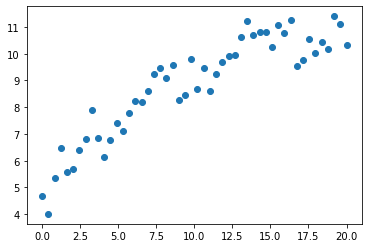

In [48]:
plt.plot(x,y,'o')

In [49]:
res = sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     219.9
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.82e-27
Time:                        11:14:13   Log-Likelihood:                -34.647
No. Observations:                  50   AIC:                             77.29
Df Residuals:                      46   BIC:                             84.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4928      0.027     18.585      0.0

In [50]:
print('Prameters:',res.params)
print('Standard Error:',res.bse)
print('Predicted Value:',res.predict())

Prameters: [ 0.4928158   0.45808577 -0.01937944  5.02010931]
Standard Error: [0.0265167  0.10424027 0.00232819 0.17193529]
Predicted Value: [ 4.53562335  4.99446915  5.41698444  5.77820395  6.06217226  6.26456519
  6.39340029  6.46771956  6.51446094  6.5640324   6.64531609  6.78092303
  6.9834782   7.25354628  7.57953889  7.93961852  8.30528637  8.64606463
  8.93450389  9.150693    9.28553041  9.34221956  9.33574252  9.29039851
  9.23581159  9.20206352  9.21475142  9.2907822   9.43559485  9.64226679
  9.89265126 10.16035876 10.41509278 10.62762744 10.77460918 10.84239374
 10.82928784 10.74582738 10.61304643 10.45902139 10.31425812 10.20667991
 10.15703976 10.17551072 10.26001451 10.39656292 10.56155611 10.72565994
 10.85862548 10.93425888]


In [51]:
res.fittedvalues == res.predict()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

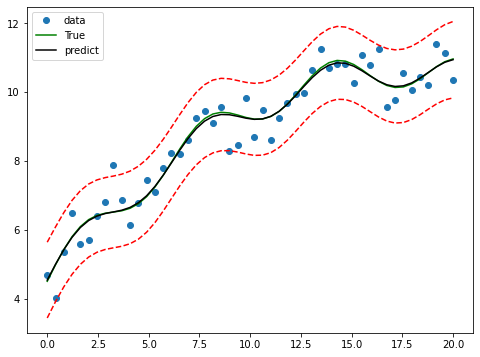

In [56]:
prstd,iv_l,iv_u = wls_prediction_std(res)
plt.figure(figsize=(8,6))
plt.plot(x,y,'o',label='data')
plt.plot(x,y_true,'g-',label='True')
plt.plot(x,res.fittedvalues,'k-',label='predict')
plt.plot(x,iv_l,'r--')
plt.plot(x,iv_u,'r--')
plt.legend(loc='best')